In [17]:
from sqlalchemy import create_engine
import api_keys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [18]:
DB_USER = api_keys.DB_USER
DB_PASS = api_keys.DB_PASS
DB_URL = api_keys.DB_URL

engine = create_engine("mysql+pymysql://{0}:{1}@{2}".format(DB_USER, DB_PASS, DB_URL), echo=True) 
connection = engine.connect()

statement = """SELECT dayname(availability.time_queried) as dayquery, hour(availability.time_queried) as hourquery, available_bikes,temp,wind_speed,pressure,humidity,weather_main FROM dublin_bikes.availability, dublin_bikes.weather_current
where availability.number = 2 && weather_current.station_number = 2 && timestampdiff(MINUTE,availability.time_queried, weather_current.time_queried) < 5 && timestampdiff(MINUTE,availability.time_queried, weather_current.time_queried) > 0
order by availability.time_queried;
""" # create select statement for stations table

2021-03-30 11:45:40,268 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-03-30 11:45:40,268 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:45:40,394 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-03-30 11:45:40,394 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:45:40,634 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-03-30 11:45:40,634 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:45:40,885 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-03-30 11:45:40,885 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:45:41,007 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-03-30 11:45:41,007 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:45:41,135 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-03-30 11:45:41,135 INFO sqlalchemy.engine.base.E

In [19]:
df = pd.read_sql_query(statement, engine) # https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe

2021-03-30 11:45:42,350 INFO sqlalchemy.engine.base.Engine SELECT dayname(availability.time_queried) as dayquery, hour(availability.time_queried) as hourquery, available_bikes,temp,wind_speed,pressure,humidity,weather_main FROM dublin_bikes.availability, dublin_bikes.weather_current
where availability.number = 2 && weather_current.station_number = 2 && timestampdiff(MINUTE,availability.time_queried, weather_current.time_queried) < 5 && timestampdiff(MINUTE,availability.time_queried, weather_current.time_queried) > 0
order by availability.time_queried;

2021-03-30 11:45:42,350 INFO sqlalchemy.engine.base.Engine {}


In [ ]:
# the following notebook is based off material presented in Data Analytics module COMP47350 labs 7 and 9

In [20]:
len(df["temp"])

6482

In [21]:
df.head(5)

,dayquery,hourquery,available_bikes,temp,wind_speed,pressure,humidity,weather_main
0,Thursday,17,10,282,3,1029,66.0,Clouds
1,Thursday,17,10,281,3,1029,66.0,Clouds
2,Thursday,17,9,281,3,1029,66.0,Clouds
3,Thursday,17,9,281,3,1029,66.0,Clouds
4,Thursday,17,9,281,4,1029,66.0,Clouds


In [22]:
df.dtypes

dayquery            object
hourquery            int64
available_bikes      int64
temp                 int64
wind_speed           int64
pressure             int64
humidity           float64
weather_main        object
dtype: object

In [23]:
df.shape

(6482, 8)

In [24]:
# the following code is based on code presented in module COMP47350 lab 5
categorical_columns = df[['dayquery', 'hourquery', 'weather_main','dayquery', 'hourquery']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

continuous_columns = df.select_dtypes(['int64']).columns
datetime_columns = df.select_dtypes(['datetime64[ns]']).columns
df["humidity"] = df["humidity"].fillna(0)
df.dtypes

dayquery           category
hourquery          category
available_bikes       int64
temp                  int64
wind_speed            int64
pressure              int64
humidity            float64
weather_main       category
dtype: object

In [25]:
df.corr()

,available_bikes,temp,wind_speed,pressure,humidity
available_bikes,1.000000,-0.024007,-0.132248,0.220171,0.294703
temp,-0.024007,1.000000,0.407107,-0.071544,-0.309309
wind_speed,-0.132248,0.407107,1.000000,-0.686294,-0.440237
pressure,0.220171,-0.071544,-0.686294,1.000000,0.409868
humidity,0.294703,-0.309309,-0.440237,0.409868,1.000000


In [26]:
# the following code is based on code presented in module COMP47350 lab 7
weather_dummies = pd.get_dummies(df['weather_main'], prefix='weather_main', drop_first=False)
day_dummies = pd.get_dummies(df['dayquery'], prefix='dayquery', drop_first=False)
hour_dummies = pd.get_dummies(df['hourquery'], prefix='hourquery', drop_first=False)

In [27]:
# the following code is based on code presented in module COMP47350 lab 7
df_final = pd.get_dummies(df, drop_first=False)

In [28]:
df_final

,available_bikes,temp,wind_speed,pressure,humidity,dayquery_Friday,dayquery_Monday,dayquery_Saturday,dayquery_Sunday,dayquery_Thursday,...,hourquery_20,hourquery_21,hourquery_22,hourquery_23,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Mist,weather_main_Rain
0,10,282,3,1029,66.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,10,281,3,1029,66.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,9,281,3,1029,66.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,9,281,3,1029,66.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,9,281,4,1029,66.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,9,286,3,1025,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6478,8,286,3,1025,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6479,9,284,3,1025,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6480,9,284,3,1025,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
# the following code is based on code presented in module COMP47350 lab 7
cont_features = ['temp', "humidity", "wind_speed"]
categ_features = day_dummies.columns.values.tolist() + weather_dummies.columns.values.tolist()
features = cont_features + categ_features
X = df_final[features]
y = df_final.available_bikes

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
       temp  humidity  wind_speed  dayquery_Friday  dayquery_Monday  \
0      282      66.0           3                0                0   
1      281      66.0           3                0                0   
2      281      66.0           3                0                0   
3      281      66.0           3                0                0   
4      281      66.0           4                0                0   
...    ...       ...         ...              ...              ...   
6477   286       0.0           3                0                0   
6478   286       0.0           3                0                0   
6479   284       0.0           3                0                0   
6480   284       0.0           3                0                0   
6481   285       0.0           4                0                0   

      dayquery_Saturday  dayquery_Sunday  dayquery_Thursday  dayquery_Tuesday  \
0                     0                0         

In [30]:
# the following code is based on code presented in module COMP47350 lab 7
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("accuracy score:", metrics.accuracy_score(testActualVal, predictions)) 
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))


In [31]:
# the following code is based on code presented in module COMP47350 lab 7
linreg = DecisionTreeClassifier().fit(X[features], y)
linreg_predictions = linreg.predict(X[features])

In [32]:
printMetrics(y, linreg_predictions)


MAE:  1.076056772601049
RMSE:  2.4777006091428286
R2:  0.7329974795177929


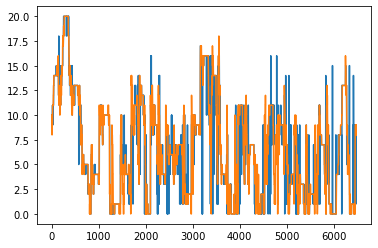

In [33]:
plt.plot(linreg_predictions)
plt.plot(y)

# The following is the model we use

In [35]:
# the following code is based on code presented in module COMP47350 lab 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
# the following code is based on code presented in module COMP47350 lab 7
linreg = DecisionTreeRegressor().fit(X_train, y_train)

In [37]:
# the following code is based on code presented in module COMP47350 lab 7
# Predicted price on training set
train_predictions = linreg.predict(X_train)
print("Actual vs predicted on training:\n", pd.concat([y_train, pd.DataFrame(train_predictions, columns=['Predicted'], index=y_train.index)], axis=1))
printMetrics(y_train, train_predictions)

Actual vs predicted on training:
       available_bikes  Predicted
6365                0   1.000000
1002                3   3.636364
1176               10  10.407407
5857                9   7.470588
5925                1   0.833333
...               ...        ...
4931                7   8.500000
3264               16  16.000000
1653                3   4.428571
2607                7   4.888889
2732                7   7.000000

[4537 rows x 2 columns]

MAE:  1.1402466393581996
RMSE:  1.9589307749639209
R2:  0.8337571275360629


In [38]:
# the following code is based on code presented in module COMP47350 lab 7
test_predictions = linreg.predict(X_test)
print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1))
printMetrics(y_test, test_predictions)

Actual vs predicted on test:
       available_bikes  Predicted
3572               12  11.666667
6270               13  12.833333
2884                2   4.500000
1855                6   6.000000
2543                6   6.000000
...               ...        ...
3473               14  11.857143
6447                0   3.400000
6355                1   2.750000
556                12  12.000000
2542                6   6.000000

[1945 rows x 2 columns]

MAE:  1.3422479132040057
RMSE:  2.2698076517022336
R2:  0.7738379391960024


In [39]:
from sklearn import tree

[Text(397.1492185430374, 532.7280000000001, 'X[1] <= 31.0\nmse = 23.083\nsamples = 4537\nvalue = 6.777'),
 Text(284.4411312907604, 510.98400000000004, 'X[4] <= 0.5\nmse = 19.011\nsamples = 3641\nvalue = 6.016'),
 Text(157.8532243571064, 489.24, 'X[0] <= 275.5\nmse = 16.736\nsamples = 3118\nvalue = 5.563'),
 Text(9.632552404438965, 467.49600000000004, 'X[3] <= 0.5\nmse = 2.611\nsamples = 114\nvalue = 10.658'),
 Text(6.42170160295931, 445.752, 'X[2] <= 3.5\nmse = 0.977\nsamples = 77\nvalue = 11.519'),
 Text(4.953884093711467, 424.00800000000004, 'X[11] <= 0.5\nmse = 0.64\nsamples = 73\nvalue = 11.644'),
 Text(4.219975339087546, 402.264, 'mse = 0.0\nsamples = 3\nvalue = 13.0'),
 Text(5.687792848335389, 402.264, 'X[2] <= 1.5\nmse = 0.586\nsamples = 70\nvalue = 11.586'),
 Text(4.953884093711467, 380.52000000000004, 'mse = 0.0\nsamples = 17\nvalue = 11.0'),
 Text(6.42170160295931, 380.52000000000004, 'X[2] <= 2.5\nmse = 0.628\nsamples = 53\nvalue = 11.774'),
 Text(4.953884093711467, 358.776,

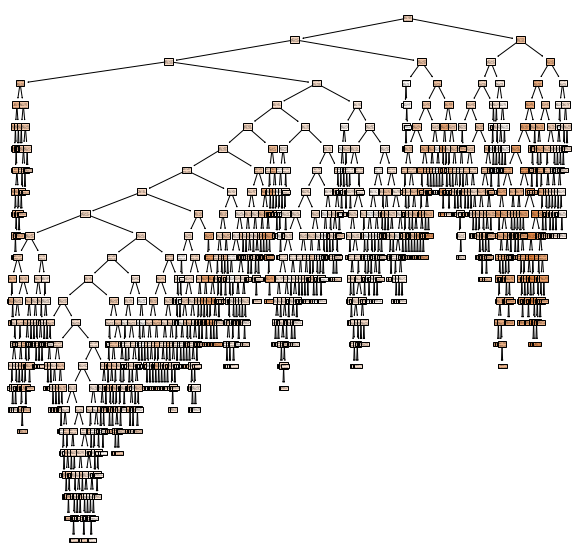

In [40]:
plt.figure(figsize=(10,10))
tree.plot_tree(linreg, filled=True)

In [41]:
# https://www.geeksforgeeks.org/saving-a-machine-learning-model/
import joblib
  
# Save the model as a pickle in a file
#joblib.dump(linreg, 'station-2.pkl')
  
# Load the model from the file
decisiontree = joblib.load('station-2.pkl')

In [42]:
features

['temp',
 'humidity',
 'wind_speed',
 'dayquery_Friday',
 'dayquery_Monday',
 'dayquery_Saturday',
 'dayquery_Sunday',
 'dayquery_Thursday',
 'dayquery_Tuesday',
 'dayquery_Wednesday',
 'weather_main_Clear',
 'weather_main_Clouds',
 'weather_main_Drizzle',
 'weather_main_Fog',
 'weather_main_Mist',
 'weather_main_Rain']

In [43]:
engine = create_engine("mysql+pymysql://{0}:{1}@{2}".format(DB_USER, DB_PASS, DB_URL), echo=True) 
connection = engine.connect()

statement = """SELECT last_update, dayname(last_update) as dayquery, hour(last_update) as hourquery, temp, humidity, wind_speed, weather_main FROM dublin_bikes.weather_forecast_1hour
where station_number = 2
order by time_queried
limit 48;"""

2021-03-30 11:47:22,345 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-03-30 11:47:22,345 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:47:22,586 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-03-30 11:47:22,586 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:47:22,829 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-03-30 11:47:22,829 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:47:23,152 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-03-30 11:47:23,152 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:47:23,352 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-03-30 11:47:23,352 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 11:47:23,518 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-03-30 11:47:23,519 INFO sqlalchemy.engine.base.E

In [44]:
df_future = pd.read_sql_query(statement, engine) # https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe

2021-03-30 11:47:24,870 INFO sqlalchemy.engine.base.Engine SELECT last_update, dayname(last_update) as dayquery, hour(last_update) as hourquery, temp, humidity, wind_speed, weather_main FROM dublin_bikes.weather_forecast_1hour
where station_number = 2
order by time_queried
limit 48;
2021-03-30 11:47:24,870 INFO sqlalchemy.engine.base.Engine {}


In [45]:
# the following code is based on code presented in module COMP47350 lab 5
categorical_columns = df_future[['dayquery', 'hourquery', 'weather_main','dayquery', 'hourquery']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df_future[column] = df_future[column].astype('category')  

df["humidity"] = df["humidity"].fillna(0)
df.dtypes

dayquery           category
hourquery          category
available_bikes       int64
temp                  int64
wind_speed            int64
pressure              int64
humidity            float64
weather_main       category
dtype: object

In [46]:
# the following code is based on code presented in module COMP47350 lab 7
df_final_future = pd.get_dummies(df_future, drop_first=False)

In [47]:
df_final_future

,last_update,temp,humidity,wind_speed,dayquery_Friday,dayquery_Saturday,dayquery_Thursday,hourquery_0,hourquery_1,hourquery_2,...,hourquery_17,hourquery_18,hourquery_19,hourquery_20,hourquery_21,hourquery_22,hourquery_23,weather_main_Clear,weather_main_Clouds,weather_main_Rain
0,2021-02-27 05:00:00,280,94,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2021-02-26 18:00:00,280,85,3,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2021-02-26 19:00:00,279,88,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2021-02-26 20:00:00,279,90,3,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2021-02-26 21:00:00,279,90,3,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,2021-02-26 22:00:00,279,90,3,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,2021-02-26 23:00:00,278,91,3,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,2021-02-27 00:00:00,278,91,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2021-02-27 01:00:00,279,90,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,2021-02-27 02:00:00,279,90,3,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [48]:
for col in features:
    if col not in df_final_future.columns:
        print(col)
        df_final_future[col] = [0 for i in range(len(df_final_future))]

dayquery_Monday
dayquery_Sunday
dayquery_Tuesday
dayquery_Wednesday
weather_main_Drizzle
weather_main_Fog
weather_main_Mist


In [49]:
result = decisiontree.predict(df_final_future[features])

In [50]:
final = pd.DataFrame(
    {'available_bikes': result.tolist(), 
     'time': df_final_future["last_update"].to_list()})

In [51]:
final

,available_bikes,time
0,18.857143,2021-02-27 05:00:00
1,10.000000,2021-02-26 18:00:00
2,20.000000,2021-02-26 19:00:00
3,20.000000,2021-02-26 20:00:00
4,20.000000,2021-02-26 21:00:00
5,20.000000,2021-02-26 22:00:00
6,14.500000,2021-02-26 23:00:00
7,20.000000,2021-02-27 00:00:00
8,18.857143,2021-02-27 01:00:00
9,20.000000,2021-02-27 02:00:00


In [56]:
decisiontree.

array([2.97645794e-01, 1.46528083e-01, 1.82022127e-01, 1.20349774e-02,
       1.17444139e-01, 6.15543447e-03, 4.93217490e-02, 2.64410914e-02,
       1.46213462e-02, 3.12974996e-02, 4.72198261e-03, 9.93112234e-02,
       3.55192116e-03, 3.43549361e-06, 3.12848779e-03, 5.77070901e-03])

In [57]:
features

['temp',
 'humidity',
 'wind_speed',
 'dayquery_Friday',
 'dayquery_Monday',
 'dayquery_Saturday',
 'dayquery_Sunday',
 'dayquery_Thursday',
 'dayquery_Tuesday',
 'dayquery_Wednesday',
 'weather_main_Clear',
 'weather_main_Clouds',
 'weather_main_Drizzle',
 'weather_main_Fog',
 'weather_main_Mist',
 'weather_main_Rain']

In [59]:
model = joblib.load('../data_analytics/station-2.pkl')
features = ['temp',  'humidity', 'wind_speed', 'dayquery_Friday', 'dayquery_Monday', 'dayquery_Saturday', 'dayquery_Sunday', 'dayquery_Thursday',
'dayquery_Tuesday', 'dayquery_Wednesday', 'weather_main_Clear', 'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Mist', 'weather_main_Rain']

DB_USER = api_keys.DB_USER
DB_PASS = api_keys.DB_PASS
DB_URL = api_keys.DB_URL


engine = create_engine("mysql+pymysql://{0}:{1}@{2}".format(DB_USER, DB_PASS, DB_URL), echo=True)
connection = engine.connect()

statement = """SELECT last_update, dayname(last_update) as dayquery, hour(last_update) as hourquery, temp, humidity, wind_speed, weather_main FROM dublin_bikes.weather_forecast_1hour
where station_number = 2
order by time_queried
limit 48;"""
df_future = pd.read_sql_query(statement, engine)
categorical_columns = df_future[['dayquery', 'hourquery', 'weather_main', 'dayquery', 'hourquery']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df_future[column] = df_future[column].astype('category')

df_future["humidity"] = df_future["humidity"].fillna(0)
df_final_future = pd.get_dummies(df_future, drop_first=False)
for col in features:
    if col not in df_final_future.columns:
        df_final_future[col] = [0 for i in range(len(df_final_future))]
result = model.predict(df_final_future[features])
final = pd.DataFrame(
    {'available_bikes': result.tolist(),
     'time': df_final_future["last_update"].to_list()})

2021-03-30 12:02:47,219 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-03-30 12:02:47,219 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 12:02:47,457 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-03-30 12:02:47,457 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 12:02:47,704 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-03-30 12:02:47,704 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 12:02:47,958 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-03-30 12:02:47,958 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 12:02:48,190 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-03-30 12:02:48,190 INFO sqlalchemy.engine.base.Engine {}
2021-03-30 12:02:48,316 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-03-30 12:02:48,316 INFO sqlalchemy.engine.base.E

In [65]:
from flask import Flask, render_template, jsonify

In [98]:
df_final_future["last_update"].astype(str).to_list()

['2021-02-27 05:00:00',
 '2021-02-26 18:00:00',
 '2021-02-26 19:00:00',
 '2021-02-26 20:00:00',
 '2021-02-26 21:00:00',
 '2021-02-26 22:00:00',
 '2021-02-26 23:00:00',
 '2021-02-27 00:00:00',
 '2021-02-27 01:00:00',
 '2021-02-27 02:00:00',
 '2021-02-27 03:00:00',
 '2021-02-27 04:00:00',
 '2021-02-25 18:00:00',
 '2021-02-27 06:00:00',
 '2021-02-27 07:00:00',
 '2021-02-27 08:00:00',
 '2021-02-27 09:00:00',
 '2021-02-27 10:00:00',
 '2021-02-27 11:00:00',
 '2021-02-27 12:00:00',
 '2021-02-27 13:00:00',
 '2021-02-27 14:00:00',
 '2021-02-27 15:00:00',
 '2021-02-27 16:00:00',
 '2021-02-26 16:00:00',
 '2021-02-25 17:00:00',
 '2021-02-25 19:00:00',
 '2021-02-25 20:00:00',
 '2021-02-25 21:00:00',
 '2021-02-25 22:00:00',
 '2021-02-25 23:00:00',
 '2021-02-26 00:00:00',
 '2021-02-26 01:00:00',
 '2021-02-26 02:00:00',
 '2021-02-26 03:00:00',
 '2021-02-26 04:00:00',
 '2021-02-26 05:00:00',
 '2021-02-26 06:00:00',
 '2021-02-26 07:00:00',
 '2021-02-26 08:00:00',
 '2021-02-26 09:00:00',
 '2021-02-26 10:

In [92]:
dictionary = dict(zip(df_final_future["last_update"].to_list(), result.tolist()))

In [93]:
dictionary

{Timestamp('2021-02-27 05:00:00'): 18.857142857142858,
 Timestamp('2021-02-26 18:00:00'): 10.0,
 Timestamp('2021-02-26 19:00:00'): 20.0,
 Timestamp('2021-02-26 20:00:00'): 20.0,
 Timestamp('2021-02-26 21:00:00'): 20.0,
 Timestamp('2021-02-26 22:00:00'): 20.0,
 Timestamp('2021-02-26 23:00:00'): 14.5,
 Timestamp('2021-02-27 00:00:00'): 20.0,
 Timestamp('2021-02-27 01:00:00'): 18.857142857142858,
 Timestamp('2021-02-27 02:00:00'): 20.0,
 Timestamp('2021-02-27 03:00:00'): 10.0,
 Timestamp('2021-02-27 04:00:00'): 9.5,
 Timestamp('2021-02-25 18:00:00'): 11.0,
 Timestamp('2021-02-27 06:00:00'): 18.857142857142858,
 Timestamp('2021-02-27 07:00:00'): 18.857142857142858,
 Timestamp('2021-02-27 08:00:00'): 18.857142857142858,
 Timestamp('2021-02-27 09:00:00'): 12.142857142857142,
 Timestamp('2021-02-27 10:00:00'): 12.142857142857142,
 Timestamp('2021-02-27 11:00:00'): 12.0,
 Timestamp('2021-02-27 12:00:00'): 12.25,
 Timestamp('2021-02-27 13:00:00'): 12.647058823529411,
 Timestamp('2021-02-27 14:0

In [91]:
dictionary

{1: 18.857142857142858,
 2: 10.0,
 3: 20.0,
 4: 20.0,
 5: 20.0,
 6: 20.0,
 7: 14.5,
 8: 20.0,
 9: 18.857142857142858,
 10: 20.0,
 11: 10.0,
 12: 9.5,
 13: 11.0,
 14: 18.857142857142858,
 15: 18.857142857142858,
 16: 18.857142857142858,
 17: 12.142857142857142,
 18: 12.142857142857142,
 19: 12.0,
 20: 12.25,
 21: 12.647058823529411,
 22: 12.647058823529411,
 23: 11.0,
 24: 12.142857142857142,
 25: 10.0,
 26: 10.0,
 27: 9.5,
 28: 10.5,
 29: 11.6,
 30: 11.6,
 31: 11.6,
 32: 11.6,
 33: 11.6,
 34: 14.333333333333334,
 35: 14.333333333333334,
 36: 14.333333333333334,
 37: 14.333333333333334,
 38: 14.333333333333334,
 39: 11.6,
 40: 10.5,
 41: 10.0,
 42: 10.0,
 43: 10.0,
 44: 10.0,
 45: 10.0,
 46: 10.0,
 47: 10.0,
 48: 10.555555555555555}